In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Cargar los datos en un DataFrame
df = pd.read_csv('ds_salaries.csv')

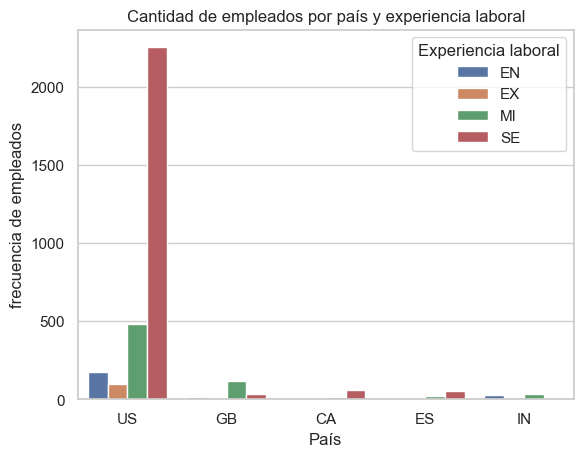

In [2]:
df_filtered = df[df['experience_level'].isin(['SE', 'MI', 'EN', 'EX'])]
grouped = df_filtered.groupby(['employee_residence', 'experience_level']).size().reset_index(name='count')
top_countries = grouped.groupby('employee_residence').sum().sort_values('count', ascending=False).head(5).index.tolist()
grouped = grouped[grouped['employee_residence'].isin(top_countries)]
sns.set(style='whitegrid')

sns.barplot(data=grouped, x='employee_residence', y='count', hue='experience_level', order=top_countries)

plt.title('Cantidad de empleados por país y experiencia laboral')
plt.xlabel('País')
plt.ylabel('frecuencia de empleados')
plt.legend(title='Experiencia laboral')

In [3]:
pivot_top_paises = pd.pivot_table(grouped, values='count', index='employee_residence', columns='experience_level', fill_value=0)
pivot_top_paises.index.name = "Paises donde viven los empleados"
pivot_top_paises['Total'] = pivot_top_paises.sum(axis=1)
pivot_top_paises_sorted = pivot_top_paises.sort_values(by='Total', ascending=False)
pivot_top_paises_sorted.columns.name = 'Nivel de experiencia'
pivot_top_paises_sorted.head()

Nivel de experiencia,EN,EX,MI,SE,Total
Paises donde viven los empleados,,,,,
US,173,97,481,2253,3004
GB,13,2,117,35,167
CA,7,3,15,60,85
ES,5,1,22,52,80
IN,26,2,32,11,71


In [4]:
# calcular la moda del job_title y el recuento de ocurrencias
mode_title = df['job_title'].mode()[0]
count_mode = df['job_title'].value_counts()[mode_title]

# imprimir los resultados
print(f"La moda del job_title es '{mode_title}' con un recuento de {count_mode} ocurrencias.")

La moda del job_title es 'Data Engineer' con un recuento de 1040 ocurrencias.


In [5]:
# Filtramos los registros que corresponden a empleados que residan en Estados Unidos
us_df = df[df['employee_residence'] == 'US']
# Agrupamos los registros por el experience_level y calculamos la mediana del salario en dólares para cada grupo
mediana_por_experience_level = us_df.groupby('experience_level')['salary_in_usd'].median()

print(mediana_por_experience_level)

experience_level
EN     93000.0
EX    200000.0
MI    125000.0
SE    150000.0
Name: salary_in_usd, dtype: float64


Text(0.5, 1.0, 'Mediana Salario por Experience Level en US')

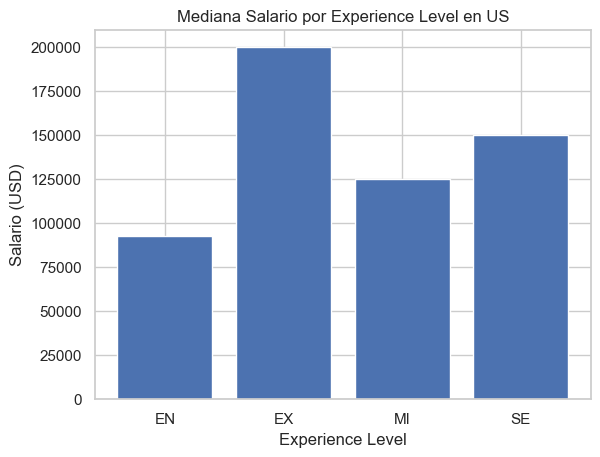

In [6]:
# Crear figura y ejes
fig, ax = plt.subplots()

# Crear gráfica de barras
ax.bar(mediana_por_experience_level.index, mediana_por_experience_level)

# Personalizar etiquetas y títulos
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salario (USD)')
ax.set_title('Mediana Salario por Experience Level en US')

In [7]:
# Filtrar por employee_residence sea US
us_data = df[df["employee_residence"] == "US"]

# Calcular la media del salario en USD por experience_level
salary_mean_by_exp_level = us_data.groupby("experience_level")["salary_in_usd"].mean()

salary_mean_by_exp_level.head()

experience_level
EN    105478.017341
EX    208037.742268
MI    129903.031185
SE    158973.194407
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Salario en USD')

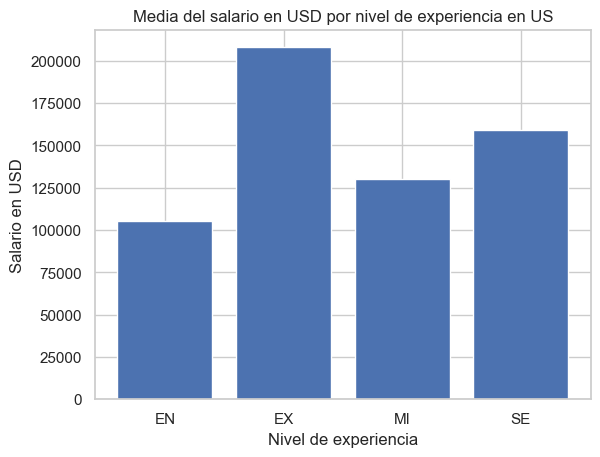

In [8]:
# Crear gráfico de barras
plt.bar(salary_mean_by_exp_level.index, salary_mean_by_exp_level.values)

# Configurar títulos y etiquetas de los ejes
plt.title("Media del salario en USD por nivel de experiencia en US")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")

Text(0, 0.5, 'Salario en USD')

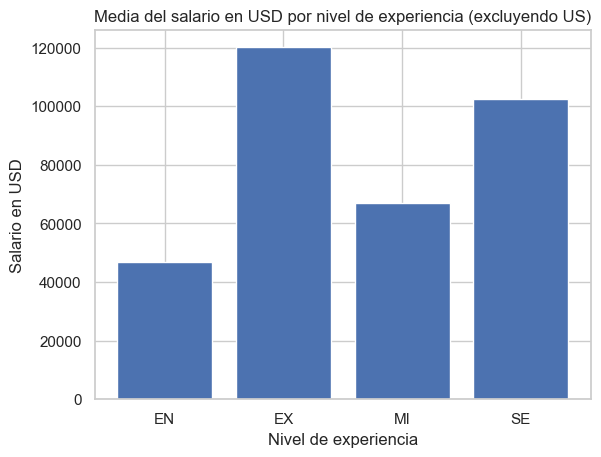

In [9]:
# Filtrar por employee_residence no sea US
non_us_data = df[df["employee_residence"] != "US"]

# Calcular la media del salario en USD por experience_level
salary_mean_by_exp_level = non_us_data.groupby("experience_level")["salary_in_usd"].mean()

# Crear el gráfico de barras
plt.bar(salary_mean_by_exp_level.index, salary_mean_by_exp_level.values)

# Configurar el título y las etiquetas de los ejes
plt.title("Media del salario en USD por nivel de experiencia (excluyendo US)")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")

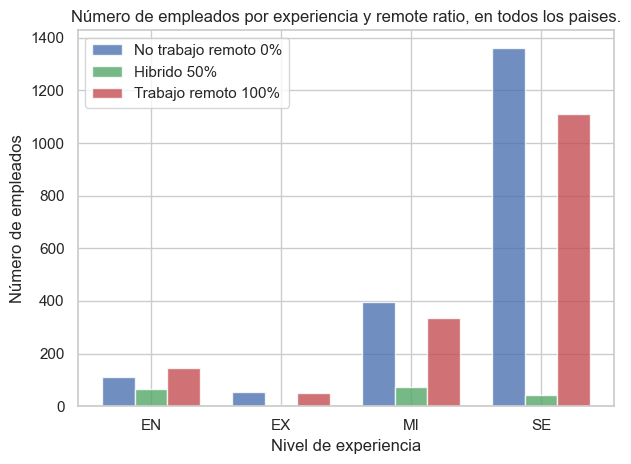

In [10]:
# filtrar el dataframe original para obtener solo los remote_ratio 0, 50 y 100
df_filtered = df[df['remote_ratio'].isin([0, 50, 100])]

# agrupar por experience_level y remote_ratio y contar cuántos trabajan en cada combinación
grouped = df_filtered.groupby(['experience_level', 'remote_ratio']).size().unstack()

# crear el gráfico de barras agrupados
fig, ax = plt.subplots()
index = np.arange(len(grouped.index))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, grouped[0], bar_width, alpha=opacity, color='b', label='No trabajo remoto 0%')
rects2 = ax.bar(index + bar_width, grouped[50], bar_width, alpha=opacity, color='g', label='Hibrido 50%')
rects3 = ax.bar(index + 2*bar_width, grouped[100], bar_width, alpha=opacity, color='r', label='Trabajo remoto 100%')

ax.set_xlabel('Nivel de experiencia')
ax.set_ylabel('Número de empleados')
ax.set_title('Número de empleados por experiencia y remote ratio, en todos los paises.')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped.index)
ax.legend()

fig.tight_layout()

In [20]:
freq_ex_levels = df['experience_level'].value_counts()
# Creamos un DataFrame con los valores de freq_ex_levels
df_freq_ex_levels = pd.DataFrame({'Nivel de experiencia': freq_ex_levels.index, 'Frecuencia': freq_ex_levels.values})

# Creamos la tabla dinámica
pivot_table = pd.pivot_table(df_freq_ex_levels, values='Frecuencia', index='Nivel de experiencia')

# Mostramos la tabla dinámica
pivot_table.head()

,Frecuencia
Nivel de experiencia,
EN,320
EX,114
MI,805
SE,2516


In [21]:
# Calcular la mediana y media aritmética de los salarios en USD para los datos con experience_level == 'EX'
median_salary_EX = df['salary_in_usd'].median()
mean_salary_EX = df['salary_in_usd'].mean()

# Imprimir los resultados
print("Mediana de salarios para experiencia nivel EX: USD", median_salary_EX)
print("Media de salarios para experiencia nivel EX: USD", mean_salary_EX)
print(mean_salary_EX - median_salary_EX)

Mediana de salarios para experiencia nivel EX: USD 135000.0
Media de salarios para experiencia nivel EX: USD 137570.38988015978
2570.3898801597825


([<matplotlib.patches.Wedge at 0x22640959190>,
 [Text(-0.4206329078116555, 1.0163995065258107, 'Europa'),
  Text(0.2571255296420056, -1.0695262792499856, 'América del Norte'),
  Text(0.17139601585285208, 1.0865649569858993, 'Otros')],
 [Text(-0.22943613153363027, 0.5543997308322604, '12.5%'),
  Text(0.14025028889563937, -0.5833779704999921, '82.5%'),
  Text(0.0934887359197375, 0.5926717947195813, '5.0%')])

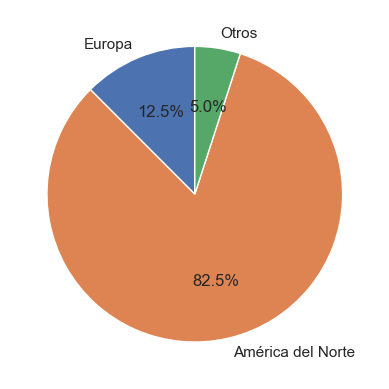

In [15]:
# Definir los datos
sizes = [469, 3099, 187]
labels = ['Europa', 'América del Norte', 'Otros']

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de torta
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


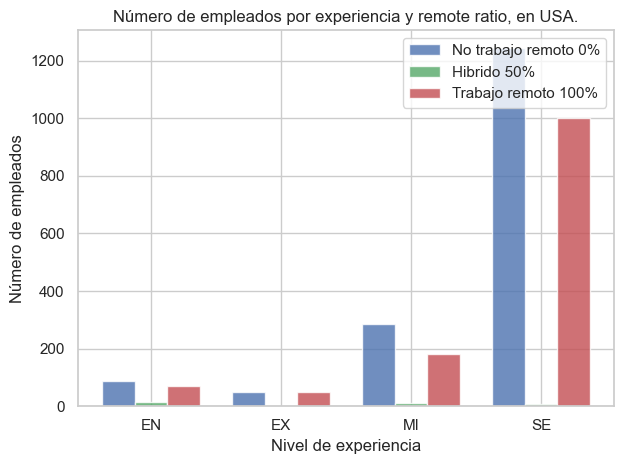

In [16]:
# filtrar el dataframe original para obtener solo los remote_ratio 0, 50 y 100
df_filtered = df.loc[df['employee_residence'] == 'US'].loc[df['remote_ratio'].isin([0, 50, 100])]

# agrupar por experience_level y remote_ratio y contar cuántos trabajan en cada combinación
grouped = df_filtered.groupby(['experience_level', 'remote_ratio']).size().unstack()

# crear el gráfico de barras agrupados
fig, ax = plt.subplots()
index = np.arange(len(grouped.index))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, grouped[0], bar_width, alpha=opacity, color='b', label='No trabajo remoto 0%')
rects2 = ax.bar(index + bar_width, grouped[50], bar_width, alpha=opacity, color='g', label='Hibrido 50%')
rects3 = ax.bar(index + 2*bar_width, grouped[100], bar_width, alpha=opacity, color='r', label='Trabajo remoto 100%')

ax.set_xlabel('Nivel de experiencia')
ax.set_ylabel('Número de empleados')
ax.set_title('Número de empleados por experiencia y remote ratio, en USA.')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped.index)
ax.legend()

fig.tight_layout()

In [17]:
grouped.index.name = "Experiencia de nivel"
grouped.columns.name = "Trabajo remoto en USA."
grouped = grouped.fillna("-")
grouped

Trabajo remoto en USA.,0,50,100
Experiencia de nivel,,,
EN,89.0,15.0,69.0
EX,49.0,-,48.0
MI,286.0,12.0,183.0
SE,1243.0,8.0,1002.0


In [22]:
def columns_data_to_array(archive, column=0, limit=100):
    selected_column = archive.columns[column]
    ls = []
    l = 1
    for index, row in archive.iterrows():
        if l <= limit:
            val = row[selected_column]
            ls.append(val)
            l += 1
        else:
            break

    return ls

def gini_coefficient(values):
    # Ordenar los valores de forma ascendente
    sorted_values = sorted(values)
    n = len(values)

    # Calcular la suma acumulada de las frecuencias relativas
    cumulative_sum = sum((i + 1) * val for i, val in enumerate(sorted_values))

    # Calcular el coeficiente de Gini
    mean = sum(sorted_values) / n
    gini = (2 * cumulative_sum) / (n * sum(sorted_values)) - (n + 1) / n

    return gini

In [19]:
num_us_residents = len(df[df['employee_residence'] == 'US'])
print("Cantidad de empleados con residencia en Estados Unidos:", num_us_residents)


Cantidad de empleados con residencia en Estados Unidos: 3004
